In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# 1. SUPERVISED MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 2. UNSUPERVISED
from sklearn.cluster import KMeans

# 3. SAMPLING TECHNIQUES
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek

# 4. PIPELINE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline


#### Importing data and train test split

In [8]:
df = pd.read_csv("data/framingham_PROPERLY_cleaned.csv")



In [9]:


X = df.drop(["TenYearCHD"], axis = 1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 11)

## 1. Logistic regression 
### without undersampling or over sampling

In [10]:

pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])



param_grid = {
    'model__C': [0.01, 0.05, 1, 10],
    'model__class_weight': [{0:1, 1:3}, {0:1, 1:5}, 'balanced'],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__max_iter': [100, 1000, 10000]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)


print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best recall 0.6992490842490843
Best params: {'model__C': 0.05, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__solver': 'liblinear'}


In [11]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6400523560209425
[[417 226]
 [ 49  72]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       643
           1       0.24      0.60      0.34       121

    accuracy                           0.64       764
   macro avg       0.57      0.62      0.55       764
weighted avg       0.79      0.64      0.69       764



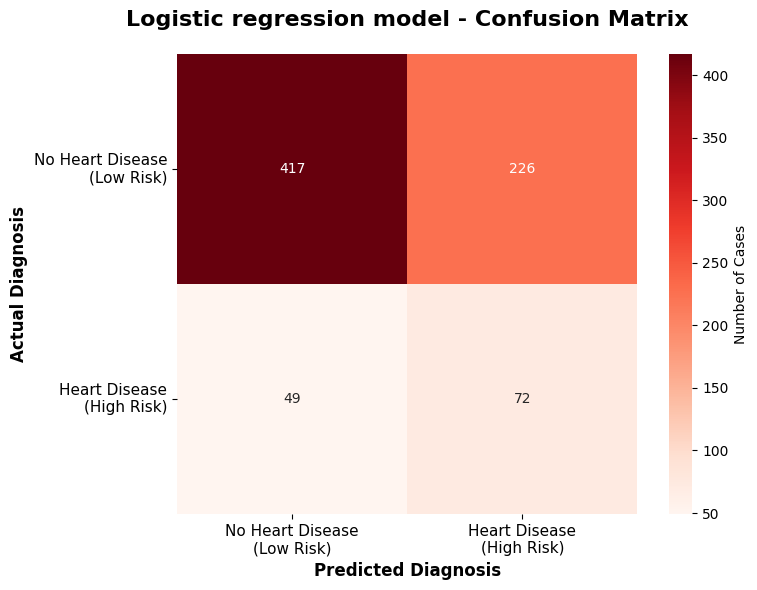

In [12]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('Logistic regression model - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

### With random under sampler

In [13]:

pipeline = Pipeline(steps = [
    ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])



param_grid = {
    'model__C': [0.01, 0.05, 1, 10],
    'model__class_weight': [{0:1, 1:3}, {0:1, 1:5}, 'balanced'],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__max_iter': [100, 1000, 10000]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)


print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_





Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best recall 0.929139194139194
Best params: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__solver': 'lbfgs'}


In [14]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.3887434554973822
[[186 457]
 [ 10 111]]
              precision    recall  f1-score   support

           0       0.95      0.29      0.44       643
           1       0.20      0.92      0.32       121

    accuracy                           0.39       764
   macro avg       0.57      0.60      0.38       764
weighted avg       0.83      0.39      0.42       764



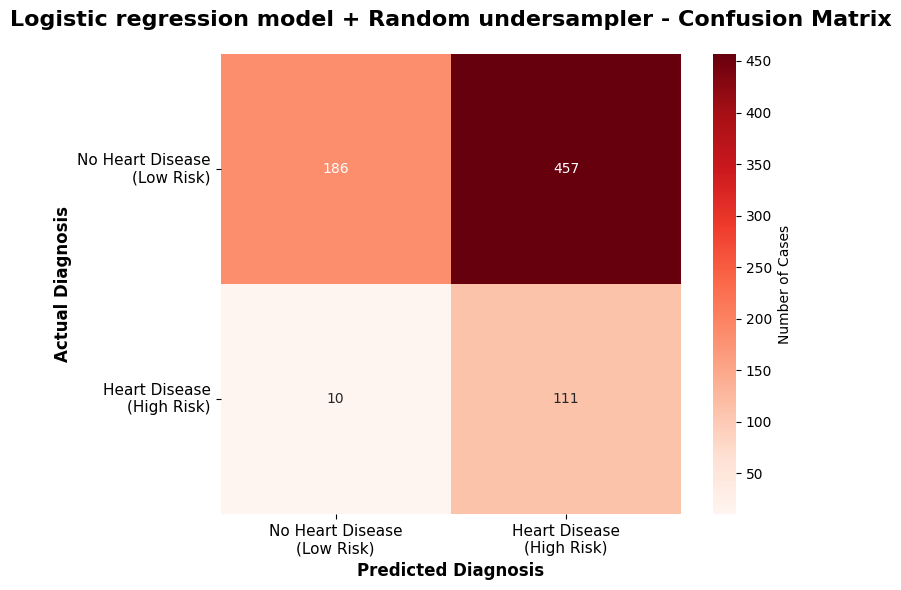

In [15]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('Logistic regression model + Random undersampler - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

### SMOTE

In [16]:

pipeline = Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])



param_grid = {
    'model__C': [0.01, 0.05, 1, 10],
    'model__class_weight': [{0:1, 1:3}, {0:1, 1:5}, 'balanced'],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__max_iter': [100, 1000, 10000]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)


print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_





Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best recall 0.9118864468864469
Best params: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__solver': 'lbfgs'}


In [18]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


0.3900523560209424
[[192 451]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.93      0.30      0.45       643
           1       0.19      0.88      0.31       121

    accuracy                           0.39       764
   macro avg       0.56      0.59      0.38       764
weighted avg       0.81      0.39      0.43       764



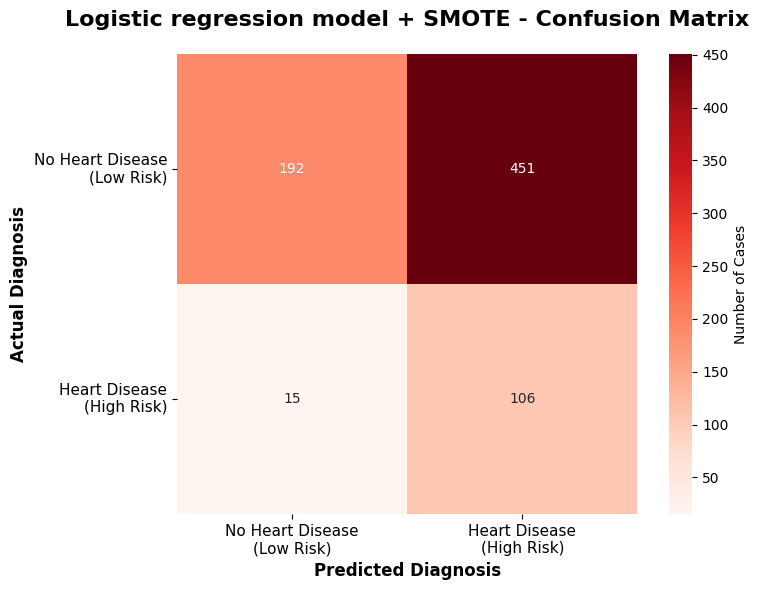

In [19]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('Logistic regression model + SMOTE - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

Before SMOTE:
Class 0: 2531
Class 1: 522

After SMOTE:
Class 0: 2531
Class 1: 1265


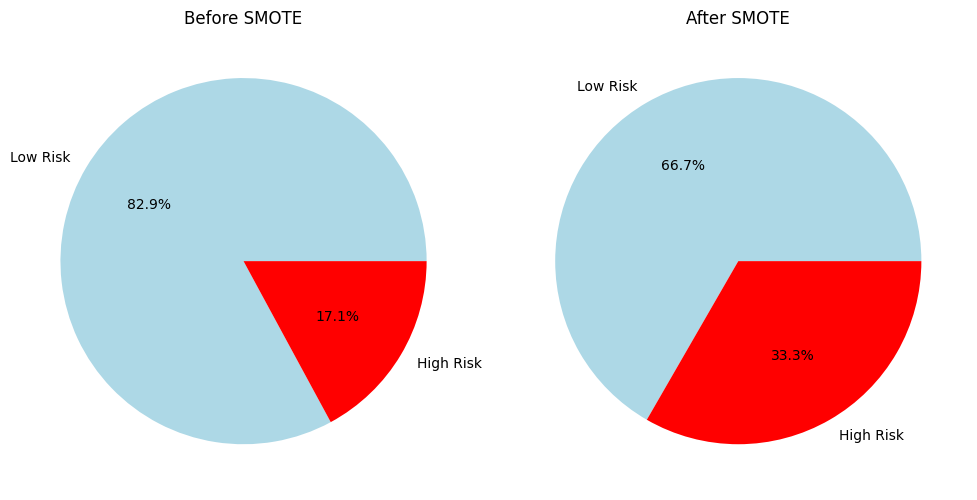

In [43]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# After your data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 1. Count classes before SMOTE
before_counts = Counter(y_train)
print("Before SMOTE:")
print(f"Class 0: {before_counts[0]}")
print(f"Class 1: {before_counts[1]}")

# 2. Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Count classes after SMOTE
after_counts = Counter(y_train_resampled)
print("\nAfter SMOTE:")
print(f"Class 0: {after_counts[0]}")
print(f"Class 1: {after_counts[1]}")

# 4. Create pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Before SMOTE pie chart
ax1.pie(before_counts.values(), labels=['Low Risk', 'High Risk'], autopct='%1.1f%%', colors=['lightblue', 'red'])
ax1.set_title('Before SMOTE')

# After SMOTE pie chart  
ax2.pie(after_counts.values(), labels=['Low Risk', 'High Risk'], autopct='%1.1f%%', colors=['lightblue', 'red'])
ax2.set_title('After SMOTE')

plt.tight_layout()
plt.show()

## 2. Random forest classifier

In [20]:
pipeline = Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])


param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20, None],
    'model__class_weight': [{0:1, 1:3}, {0:1, 1:5}, 'balanced', None],
    
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)

print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best recall 0.8965384615384616
Best params: {'model__class_weight': {0: 1, 1: 5}, 'model__max_depth': 5, 'model__n_estimators': 50}


In [24]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7997382198952879
[[593  50]
 [103  18]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       643
           1       0.26      0.15      0.19       121

    accuracy                           0.80       764
   macro avg       0.56      0.54      0.54       764
weighted avg       0.76      0.80      0.78       764



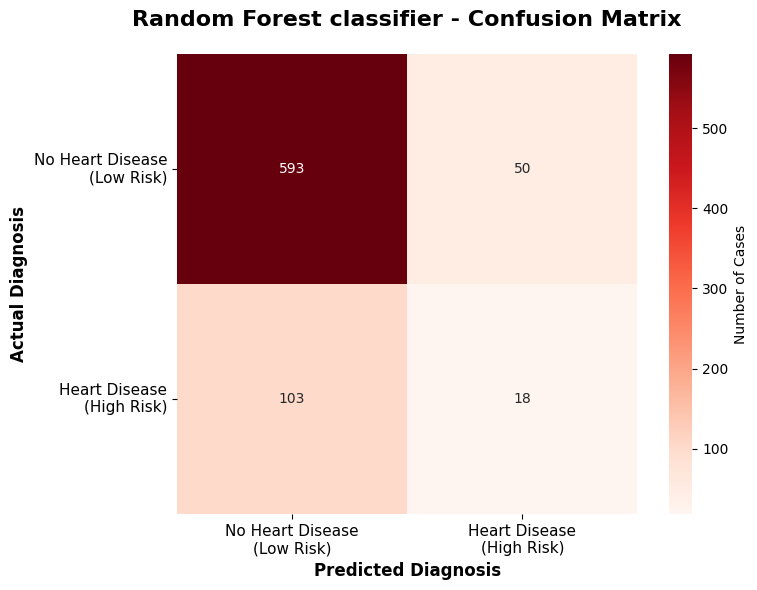

In [25]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('Random Forest classifier - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

##  3. Gradient Boosting classifier

In [26]:
pipeline = Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()),  # Note: Scaling not strictly needed for tree-based models
    ('model', GradientBoostingClassifier(random_state=42))
])

# Updated parameter grid for Gradient Boosting
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)

print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best recall 0.20503663003663003
Best params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 50}


In [27]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7997382198952879
[[593  50]
 [103  18]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       643
           1       0.26      0.15      0.19       121

    accuracy                           0.80       764
   macro avg       0.56      0.54      0.54       764
weighted avg       0.76      0.80      0.78       764



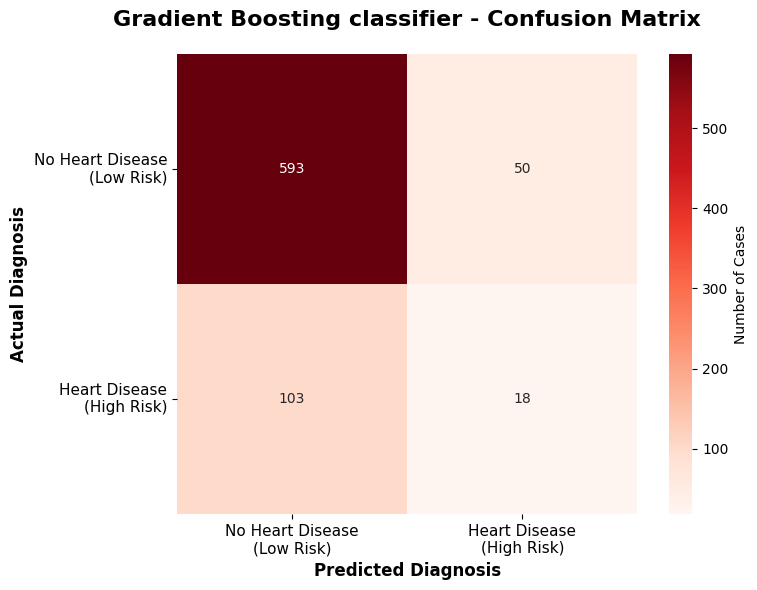

In [28]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('Gradient Boosting classifier - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

## 4. KNN

In [29]:
pipeline = Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()), 
    ('model', KNeighborsClassifier())
])


param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)

print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")


best_model = grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best recall 0.3946520146520146
Best params: {'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}


In [30]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7028795811518325
[[493 150]
 [ 77  44]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       643
           1       0.23      0.36      0.28       121

    accuracy                           0.70       764
   macro avg       0.55      0.57      0.55       764
weighted avg       0.76      0.70      0.73       764



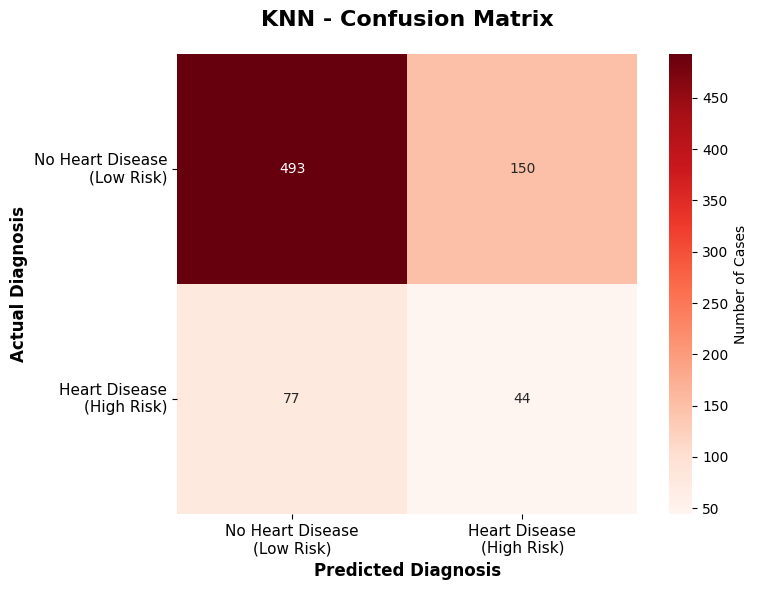

In [31]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('KNN - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

## 5. XGBoost classifier

In [32]:
pipeline = Pipeline(steps = [
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('model', XGBClassifier(random_state=42, 
                           eval_metric='logloss',
                           use_label_encoder=False))
])


param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.2, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__scale_pos_weight': [1, 3, 5]
}

grid = GridSearchCV(
    pipeline,
    param_grid,  
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
   )

grid.fit(X_train, y_train)

print(f"Best recall {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

# best model
best_model = grid.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best recall 0.8237545787545788
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__scale_pos_weight': 5}


In [33]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.4882198952879581
[[275 368]
 [ 23  98]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       643
           1       0.21      0.81      0.33       121

    accuracy                           0.49       764
   macro avg       0.57      0.62      0.46       764
weighted avg       0.81      0.49      0.54       764



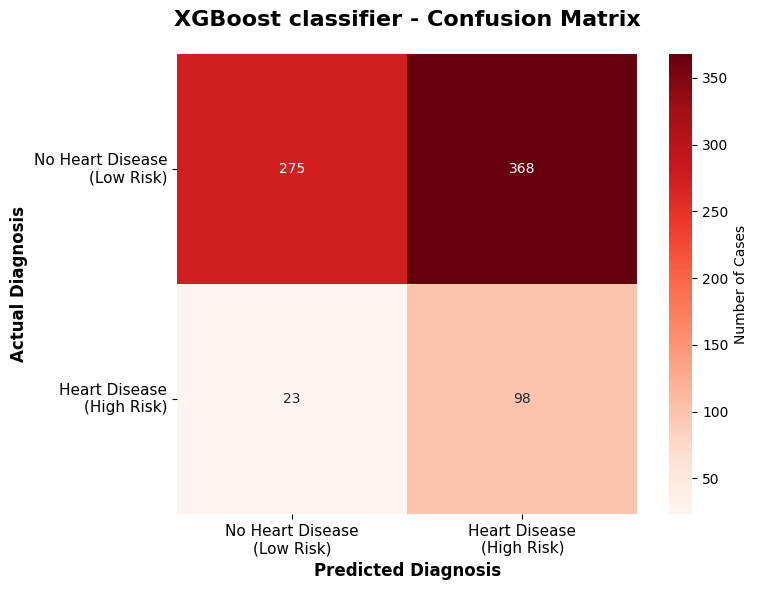

In [35]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('XGBoost classifier - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

## 6. k-means (unsupervised)

In [36]:

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)


X_train_with_risk = X_train.copy()
X_test_with_risk = X_test.copy()

X_train_with_risk['risk_cluster'] = kmeans.fit_predict(X_train)
X_test_with_risk['risk_cluster'] = kmeans.predict(X_test)


pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

param_grid = {
    'model__C': [0.01, 0.05, 1, 10],
    'model__class_weight': [{0:1, 1:3}, {0:1, 1:5}, 'balanced'],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__max_iter': [100, 1000]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
)

# Train on data with risk clusters
grid.fit(X_train_with_risk, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.01, 0.05, ...], 'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5}, ...], 'model__max_iter': [100, 1000], 'model__solver': ['liblinear', 'lbfgs']}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.5


In [37]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.4882198952879581
[[275 368]
 [ 23  98]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       643
           1       0.21      0.81      0.33       121

    accuracy                           0.49       764
   macro avg       0.57      0.62      0.46       764
weighted avg       0.81      0.49      0.54       764



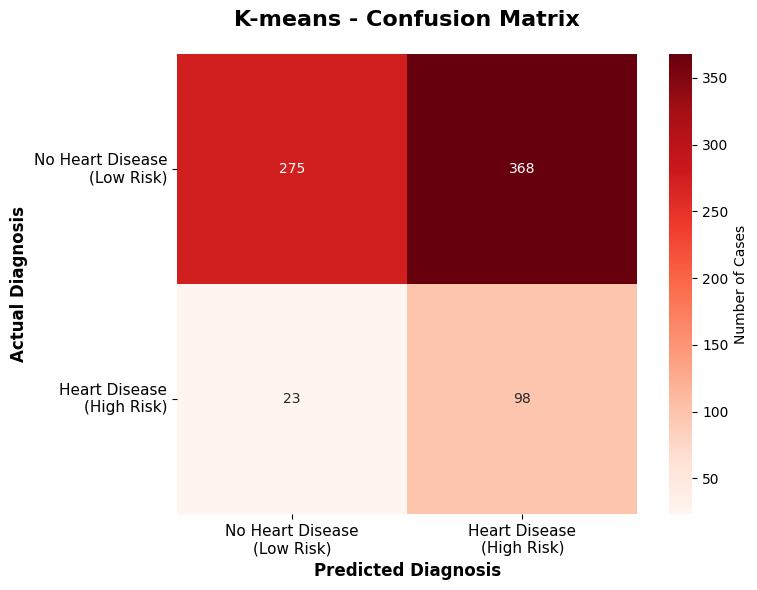

In [38]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('K-means - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

### SVC:

In [39]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  # Important for SVC!
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)),
    ('scaler', StandardScaler()),  # SVC needs feature scaling!
    ('model', SVC(random_state=42, probability=True))  # probability=True for predict_proba
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'model__kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'model__gamma': ['scale', 'auto'],
    'model__class_weight': ['balanced', {0:1, 1:3}]
}

grid = GridSearchCV(
    pipeline,
    param_grid,  
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_train, y_train)

print(f"Best recall: {grid.best_score_:.4f}")
print(f"Best params: {grid.best_params_}")

# Best model
best_model = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best recall: 0.9847
Best params: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 3}, 'model__gamma': 'scale', 'model__kernel': 'poly'}


In [40]:
pred = best_model.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.16099476439790575
[[  4 639]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       643
           1       0.16      0.98      0.27       121

    accuracy                           0.16       764
   macro avg       0.41      0.49      0.14       764
weighted avg       0.59      0.16      0.05       764



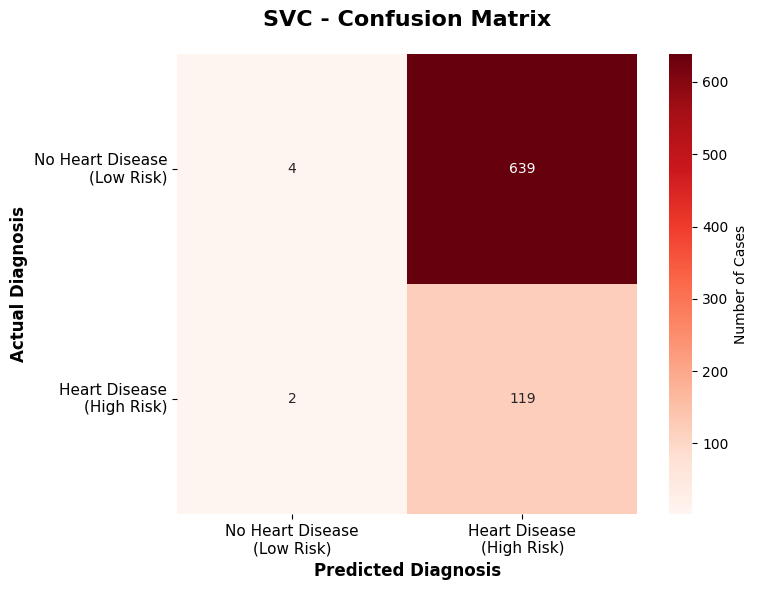

In [41]:
# Assuming your target variable meanings
class_names = {
    0: 'No Heart Disease\n(Low Risk)',
    1: 'Heart Disease\n(High Risk)'
}

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Reds',
            cbar=True,
            cbar_kws={'label': 'Number of Cases'},
            square=True)

plt.title('SVC - Confusion Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Diagnosis', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontsize=12, fontweight='bold')

# Use descriptive labels
plt.xticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11)
plt.yticks([0.5, 1.5], [class_names[0], class_names[1]], fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

## Neural network:

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get probabilities from your trained model
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# 1. Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 3. Build and train model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train_scaled, y_train_resampled, 
          epochs=100, batch_size=32, validation_split=0.2, verbose=0)
y_pred_proba = model.predict(X_test, verbose=0).flatten()

results = []
print("Testing thresholds (accuracy >= 40% only):")
print("-" * 50)

for threshold in np.arange(0.01, 1, 0.02):
    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    if accuracy >= 0.40:  # Filter for accuracy ≥ 70%
        results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'recall': recall,
            'tp': tp,
            'fn': fn,
            'fp': fp,
            'tn': tn
        })
        
        print(f"Threshold {threshold:.2f}: Acc={accuracy:.3f}, Recall={recall:.3f}, TP={tp}, FN={fn}")

# Find best recall among results with accuracy ≥ 70%
if results:
    best_result = max(results, key=lambda x: x['recall'])
    
    print("\n" + "="*50)
    print("BEST MODEL (Accuracy ≥ 50%):")
    print("="*50)
    print(f"Threshold: {best_result['threshold']:.3f}")
    print(f"Accuracy: {best_result['accuracy']:.4f}")
    print(f"Recall: {best_result['recall']:.4f}")
    print(f"\nConfusion Matrix:")
    print(f"[[{best_result['tn']:4d} {best_result['fp']:4d}]")
    print(f" [{best_result['fn']:4d} {best_result['tp']:4d}]]")
    
    # Show classification report
    y_pred_best = (y_pred_proba >= best_result['threshold']).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_best))
    
else:
    print("\nNo thresholds achieved accuracy ≥ 40%!")
    print("Try lowering the accuracy requirement or improving the model.")

Testing thresholds (accuracy >= 40% only):
--------------------------------------------------

No thresholds achieved accuracy ≥ 40%!
Try lowering the accuracy requirement or improving the model.
